# Level-1_Task-3

## Geospatial Analysis
Visualize the locations of restaurants on a map using latitude and longitude information.

Analyze the distribution of restaurants across different cities or countries.

Determine if there is any correlation between the restaurant's location and its rating.

In [17]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [20]:
data = pd.read_csv('Dataset.csv')

In [21]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


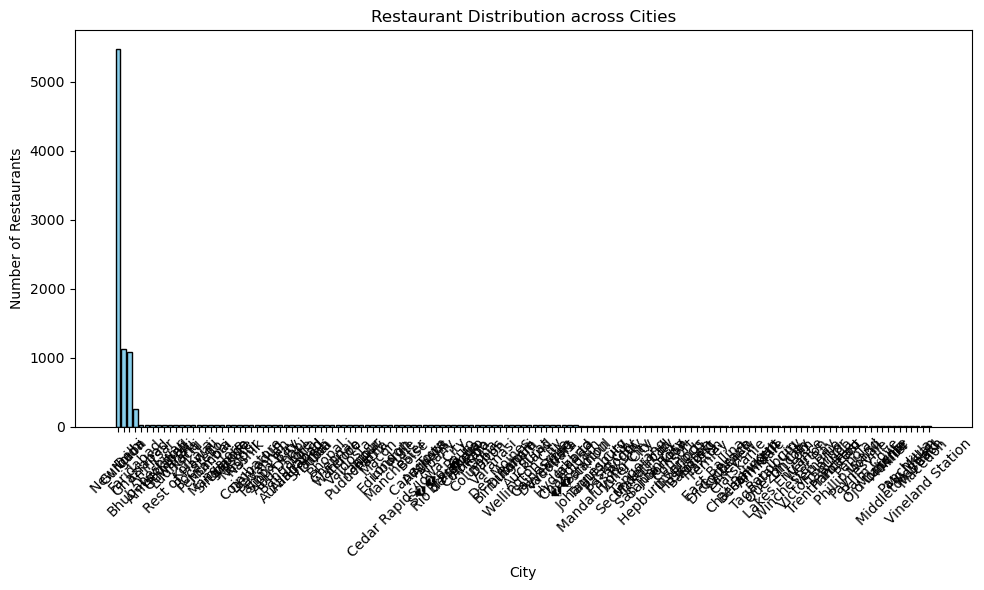

In [22]:
# Create a beautiful map of restaurant locations
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

for index, row in data.iterrows():
    popup_text = f"{row['Restaurant Name']} - Rating: {row['Votes']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, icon=folium.Icon(icon='cutlery', prefix='fa')).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

# Analyze the distribution of restaurants across different cities
city_distribution = data['City'].value_counts()

# Create a visually appealing bar chart
plt.figure(figsize=(10, 6))
plt.bar(city_distribution.index, city_distribution.values, color='skyblue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Distribution across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### To gain a deeper understanding of the distribution, let's focus on the top 10 cities and switch to a logarithmic scale for analysis.

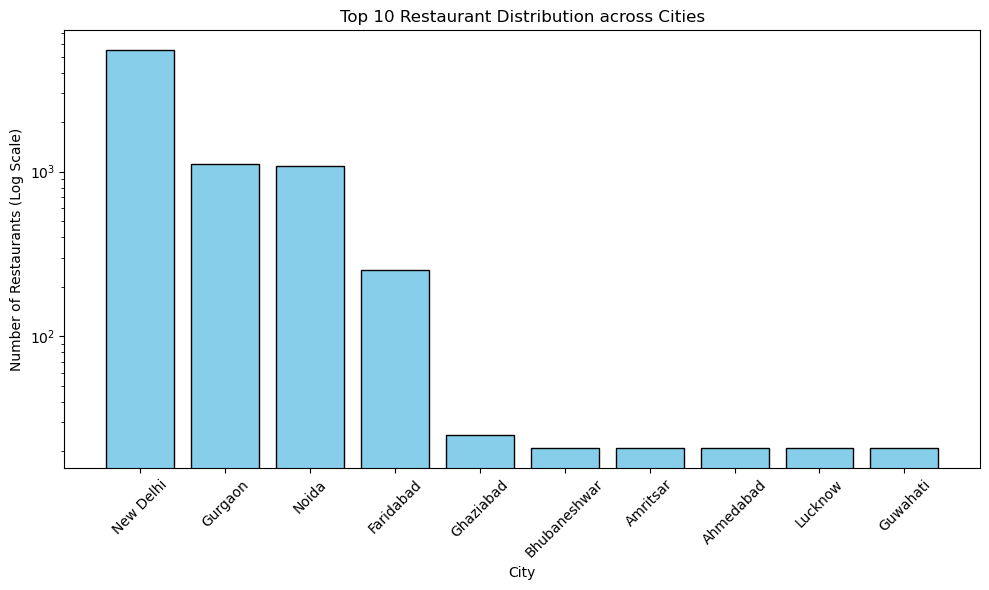

In [23]:
# Create a beautiful map of restaurant locations
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

for index, row in data.iterrows():
    popup_text = f"{row['Restaurant Name']} - Rating: {row['Votes']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, icon=folium.Icon(icon='cutlery', prefix='fa')).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

# Analyze the distribution of restaurants across different cities
city_distribution = data['City'].value_counts()

# Take the top 10 cities
top_10_cities = city_distribution.head(10)

# Create a visually appealing bar chart with a log scale
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities.index, top_10_cities.values, color='skyblue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Number of Restaurants (Log Scale)')
plt.yscale('log')  # Set the y-axis to log scale
plt.title('Top 10 Restaurant Distribution across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

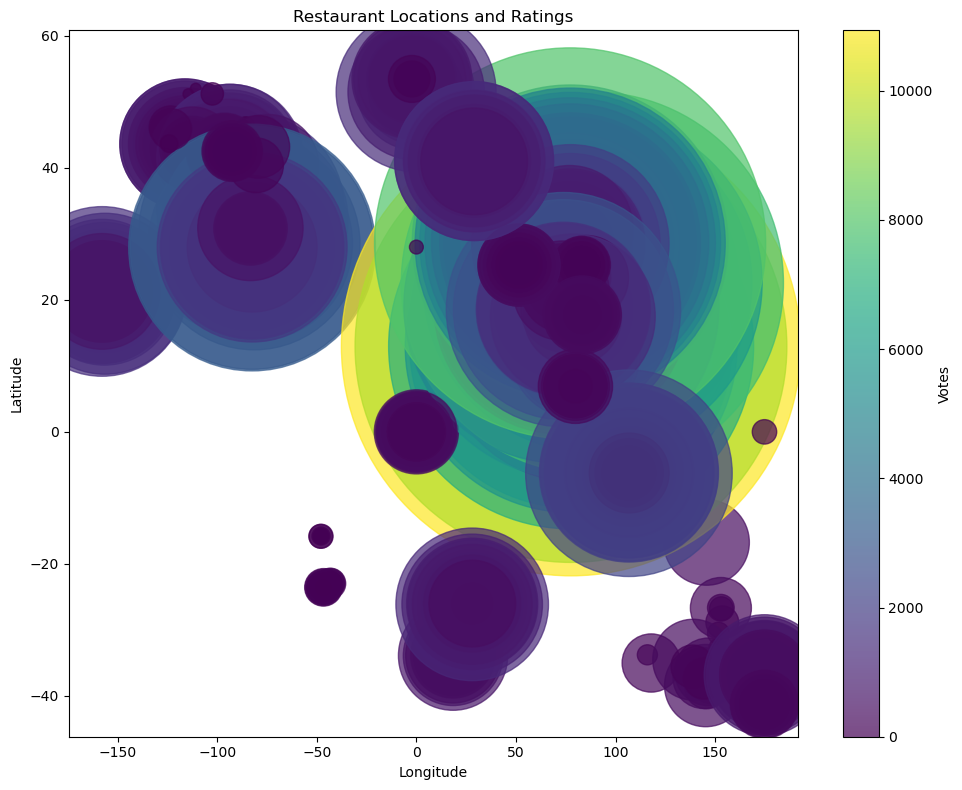

In [24]:
# Create a scatter plot with size based on rating and log scale
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=data['Votes'] * 10, c=data['Votes'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Votes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations and Ratings')
plt.tight_layout()
plt.show()

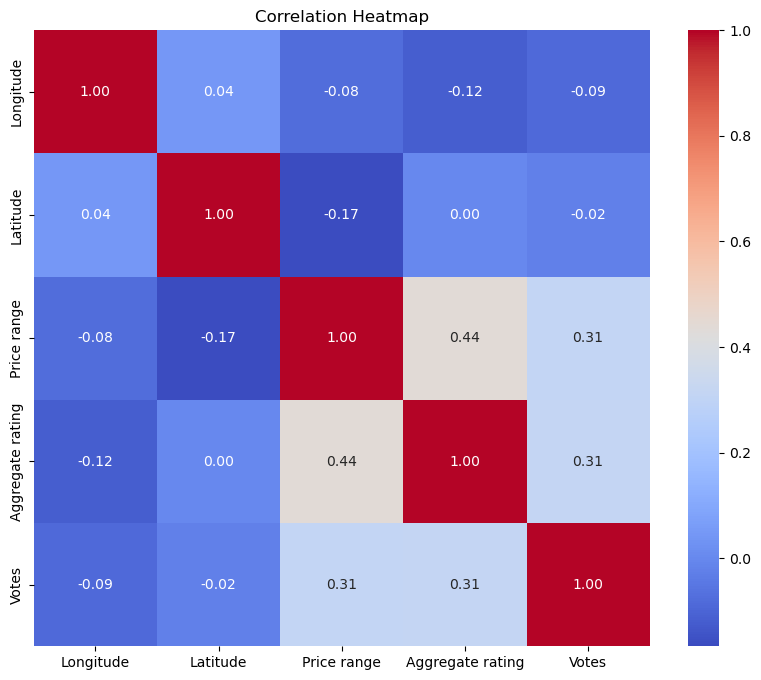

In [31]:
# Specify the columns you want to include in the correlation analysis
selected_columns = ["Longitude", "Latitude", "Cuisines", "Price range", "Aggregate rating", "Votes"]

# Create a subset of the dataset with the selected columns
correlation_data = data[selected_columns]

# Calculate the correlation matrix
#correlation_matrix = correlation_data.corr()

# Calculate the correlation matrix, specifying numeric_only=True
correlation_matrix = correlation_data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()